In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
df = pd.read_csv('/content/sample_data/data.csv')
df.shape

(748, 5)

In [33]:
df.head(205)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
200,4,6,1500,52,0
201,4,7,1750,58,0
202,6,2,500,11,1
203,4,7,1750,58,0


In [34]:
print("Missing values distribution: ")
print(df.isnull().mean())


Missing values distribution: 
Recency (months)                              0.0
Frequency (times)                             0.0
Monetary (c.c. blood)                         0.0
Time (months)                                 0.0
whether he/she donated blood in March 2007    0.0
dtype: float64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


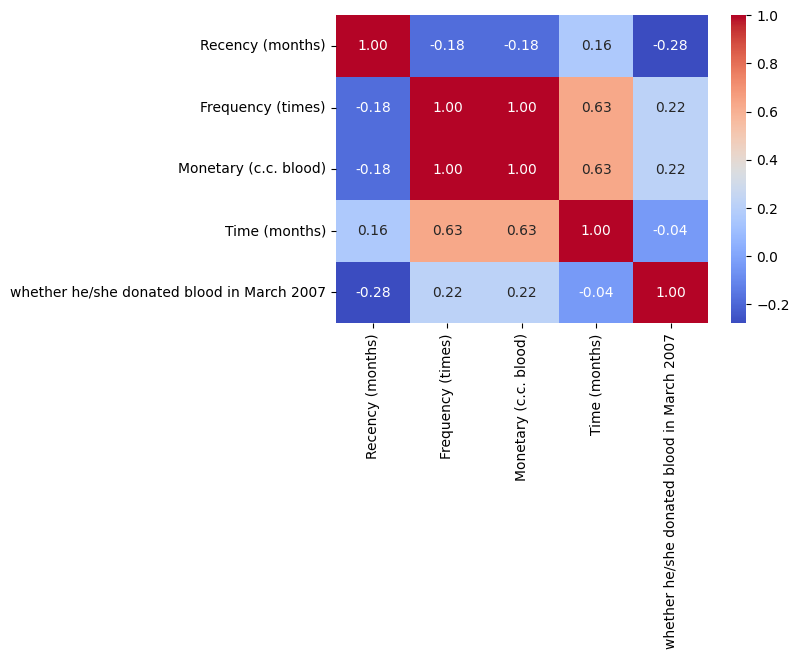

In [36]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

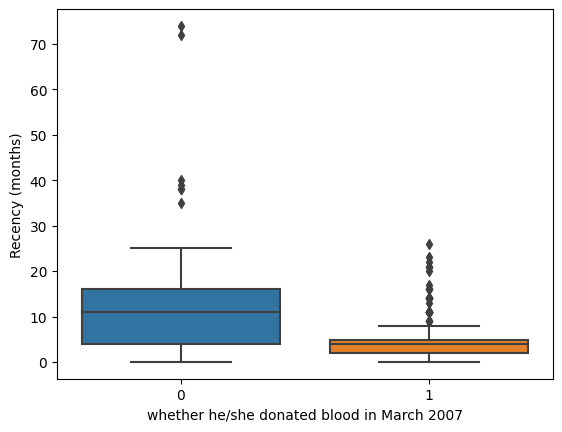

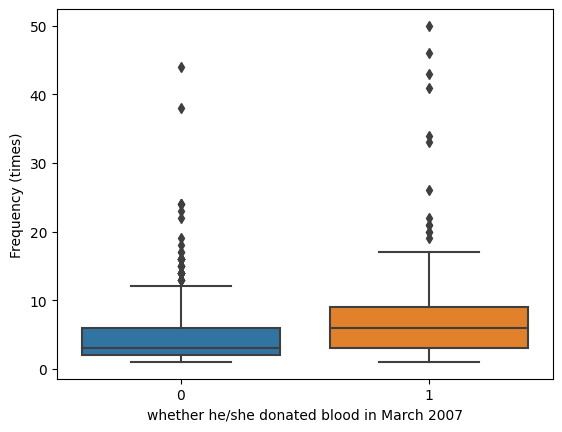

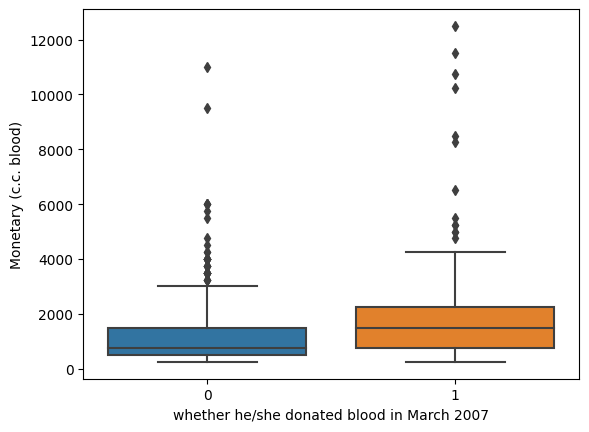

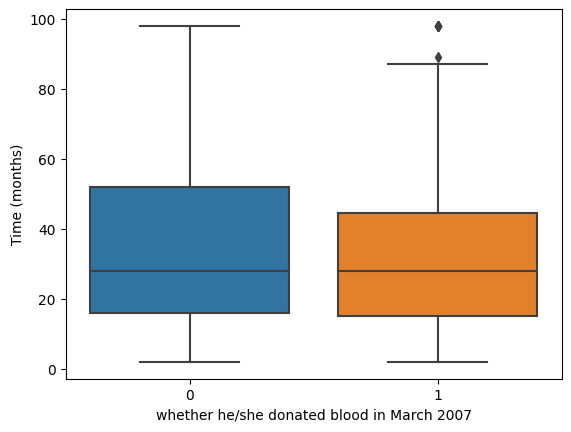

In [37]:
temp = len(df.columns)-1
for i in range(temp):
    figure = plt.figure()
    ax = sns.boxplot(x='whether he/she donated blood in March 2007', y=list(df.columns)[i], data=df)

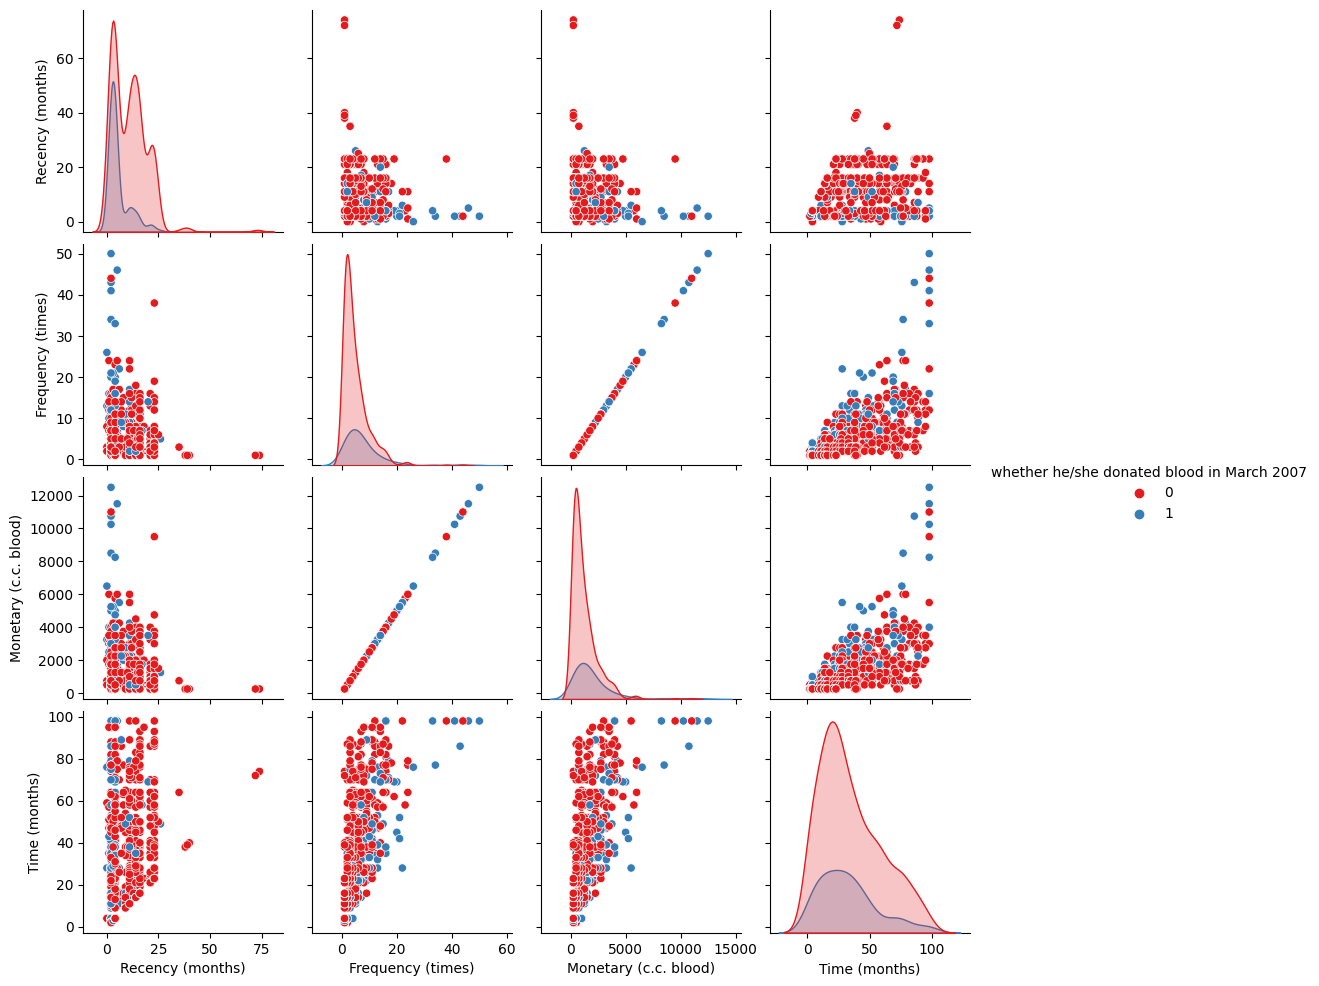

In [38]:
sns.pairplot(df, hue="whether he/she donated blood in March 2007", palette = 'Set1')

In [39]:
from sklearn.preprocessing import StandardScaler
import sklearn as sk
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [40]:
X = df.drop(['whether he/she donated blood in March 2007'], axis = 1)
y = df['whether he/she donated blood in March 2007']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler = StandardScaler()
df_test = scaler.fit(X)
print(df_test)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

StandardScaler()


In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred_KNN = knn.predict(scaled_X_test)

In [42]:
print(confusion_matrix(y_test,pred_KNN))
print(classification_report(y_test,pred_KNN))

[[100  12]
 [ 22  16]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       112
           1       0.57      0.42      0.48        38

    accuracy                           0.77       150
   macro avg       0.70      0.66      0.67       150
weighted avg       0.76      0.77      0.76       150



In [43]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

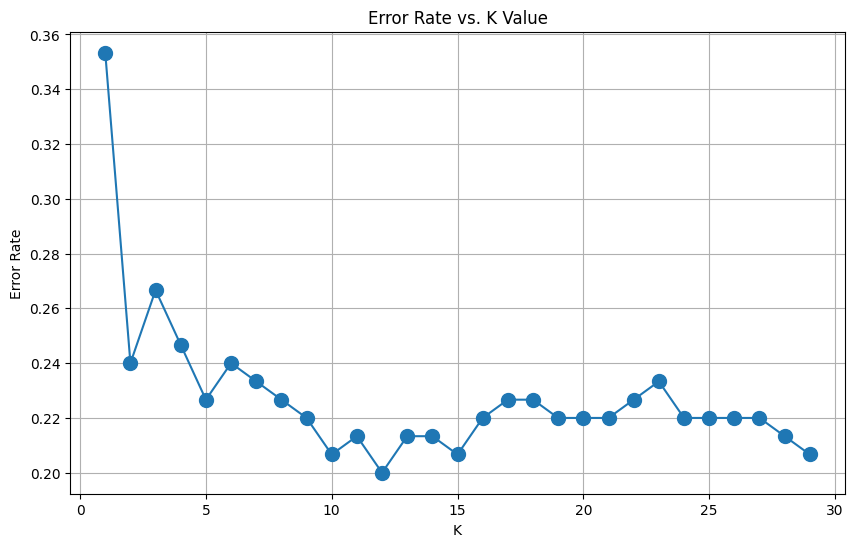

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [45]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_X_train, y_train)
pred_KNN = knn.predict(scaled_X_test)

In [46]:
print(confusion_matrix(y_test,pred_KNN))
print(classification_report(y_test,pred_KNN))

[[107   5]
 [ 26  12]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       112
           1       0.71      0.32      0.44        38

    accuracy                           0.79       150
   macro avg       0.76      0.64      0.65       150
weighted avg       0.78      0.79      0.76       150



Decision Tree


In [47]:


model = DecisionTreeClassifier(criterion='gini', max_depth = 4)
model.fit(X_train, y_train)
pred_Tree = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_Tree))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.58      0.47      0.52        38

    accuracy                           0.78       150
   macro avg       0.71      0.68      0.69       150
weighted avg       0.77      0.78      0.77       150



[[99 13]
 [20 18]]


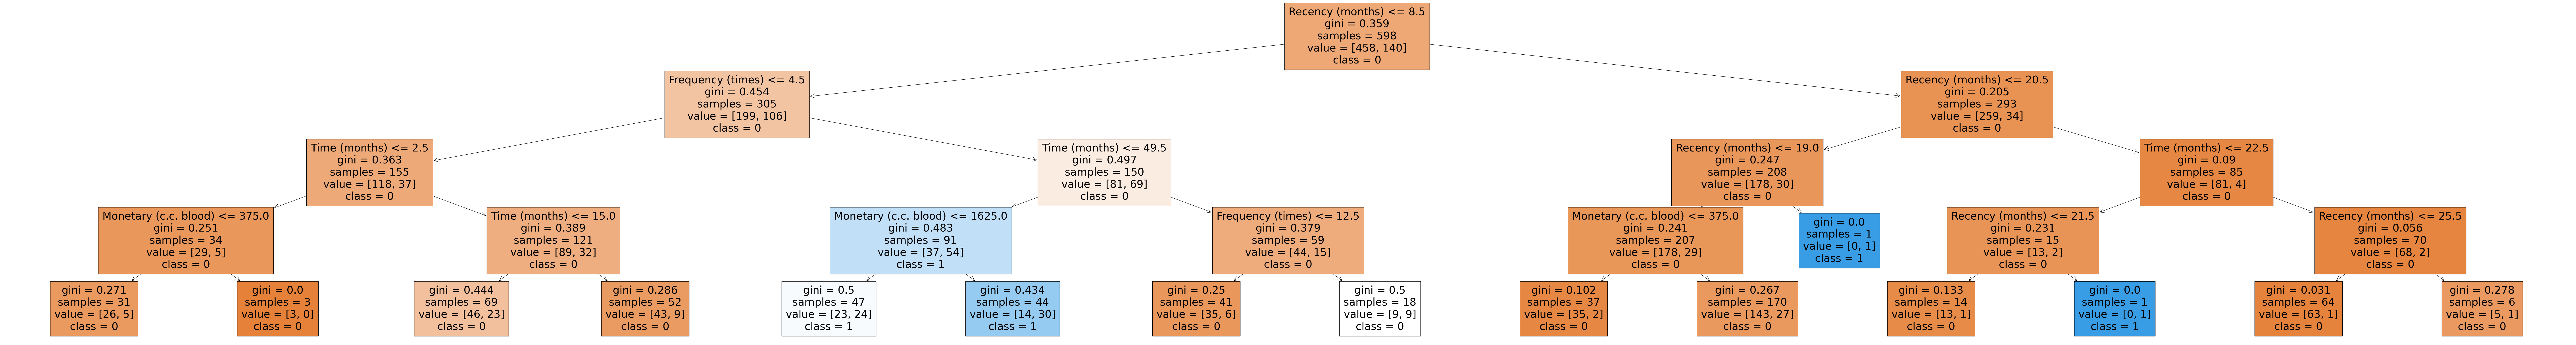

In [48]:
print(confusion_matrix(y_test, pred_Tree))
plt.figure(figsize = (150, 20))
plot_tree(model, feature_names = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'],
          class_names = ['0', '1'], filled = True)
plt.show()

**Support Vector Machine**

In [49]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_X_train,y_train)


SVC(gamma=1.0)

In [50]:
pred_SVM = model.predict(scaled_X_test)
print(confusion_matrix(y_test, pred_SVM))
print(classification_report(y_test, pred_SVM))

[[106   6]
 [ 24  14]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       112
           1       0.70      0.37      0.48        38

    accuracy                           0.80       150
   macro avg       0.76      0.66      0.68       150
weighted avg       0.79      0.80      0.78       150



In [51]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [52]:
grid.best_params_


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [53]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [54]:
grid_predictions = grid.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions))


[[106   6]
 [ 24  14]]


In [55]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       112
           1       0.70      0.37      0.48        38

    accuracy                           0.80       150
   macro avg       0.76      0.66      0.68       150
weighted avg       0.79      0.80      0.78       150



Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
pred_forest = clf.predict(X_test)

In [57]:
print(accuracy_score(y_test,pred_forest))
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

0.72
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       112
           1       0.70      0.37      0.48        38

    accuracy                           0.80       150
   macro avg       0.76      0.66      0.68       150
weighted avg       0.79      0.80      0.78       150

[[106   6]
 [ 24  14]]


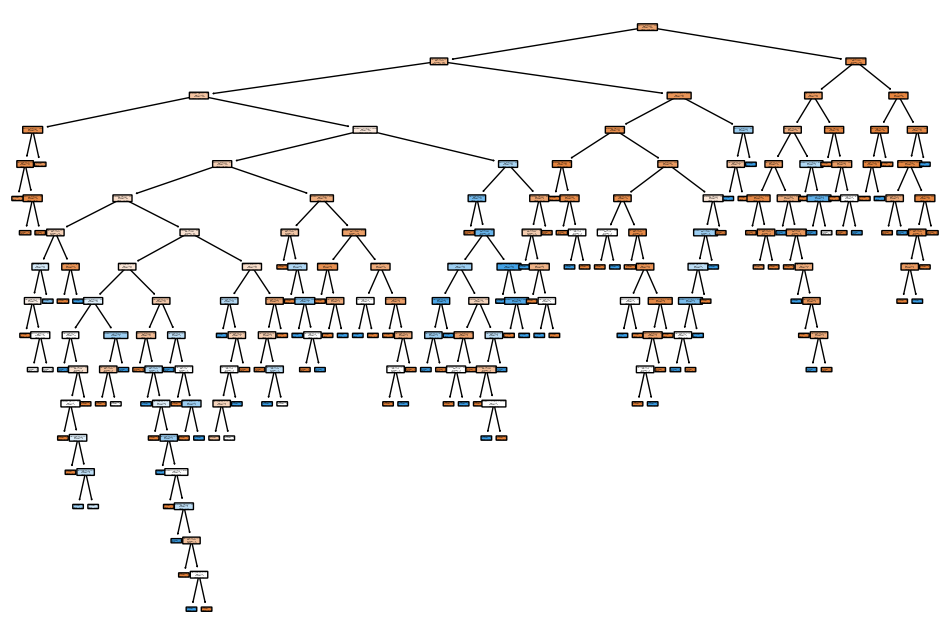

In [58]:
plt.figure(figsize=(12,8))
plot_tree(clf.estimators_[6], filled=True, rounded=True, feature_names=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'])
plt.show()

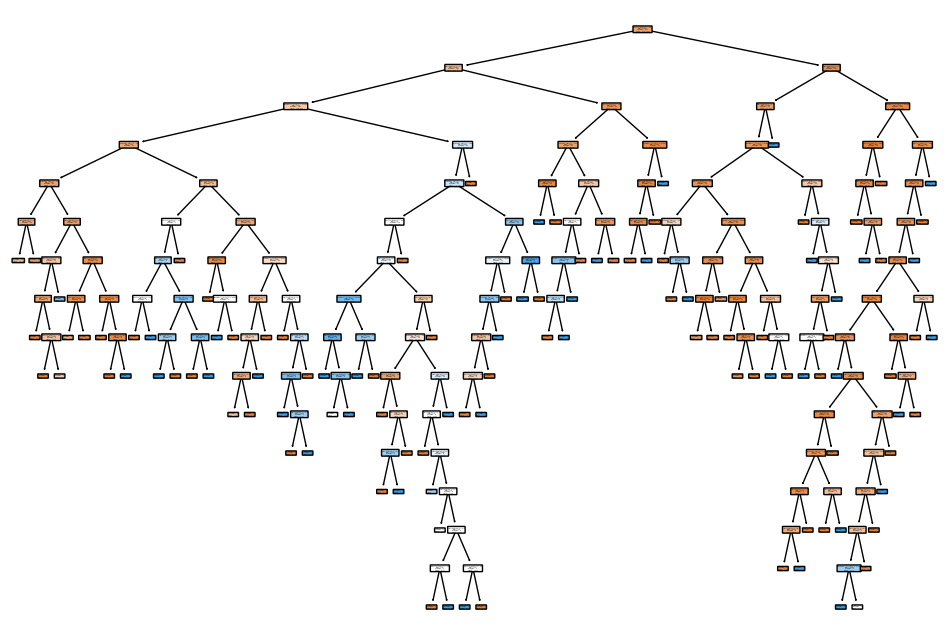

In [59]:
plt.figure(figsize=(12,8))
plot_tree(clf.estimators_[12], filled=True, rounded=True, feature_names=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'])
plt.show()

**AdaBoost**

In [60]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200)
classifier.fit(scaled_X_train, y_train.ravel())
pred_Ada = classifier.predict(scaled_X_test)

In [61]:
print(confusion_matrix(y_test, pred_Ada))
print(classification_report(y_test, pred_Ada))

[[107   5]
 [ 26  12]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       112
           1       0.71      0.32      0.44        38

    accuracy                           0.79       150
   macro avg       0.76      0.64      0.65       150
weighted avg       0.78      0.79      0.76       150



In [62]:
print("KNN")
print(accuracy_score(y_test, pred_KNN))
print("Tree")
print(accuracy_score(y_test, pred_Tree))
print("SVM")
print(accuracy_score(y_test, pred_SVM))
print("Forest")
print(accuracy_score(y_test, pred_forest))
print("Adaboost")
print(accuracy_score(y_test, pred_Ada))

KNN
0.7933333333333333
Tree
0.78
SVM
0.8
Forest
0.72
Adaboost
0.7933333333333333
